

**2-PORTFOLIO**

**DIABET kasalligiga tashxis qo`yish**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn 
%matplotlib inline

## Jarayonni tushunish

Maqsadimiz be`morning diagnostik o'lcholaridan foydalanib uning diabet kasalligiga chalingan yoki yo'qligini tekshirish.

## Analitik yondashuv

1. Supervised learning
2. Klassifikatsiya
3. Offline

## my dataset:

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/BehruzDS/DS-praktikum-datasets/main/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### **Ustun nomlari**
-`Pregnancies`: homilador bo’lish soni

-`Glucose`: glyukozaga test natijasi

-`BloodPressure`: diastolik qon bosimi (mm Hg)

-`SkinThickness`: Triceps teri burmasining qalinligi (mm)

-`Insulin`: 2 soatlik sarum insulini (mu U/ml)

-`BMI`: Tana massasi indeksi (vazn kg / (m bo’yi) ^ 2)

-`DiabetesPedigreeFunction`: diabetning naslchilik funktsiyasi

-`Age`: Yosh (yil)

-`Outcome`: Class (0 – diabet yo’q, 1 – diabet)

### datasetni o`rganamiz:

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### Ma'lumotlar toza. mavjud bo`lmagan qiymatlar yo'q. barcha ustunlar sonli. Yaxshi, davom etamiz.

In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Bizga muhim bo'lgan ustun `Outcome`. Shu ustun bilan Korelyatsiyani tekshiramiz.

In [9]:
corr_matrix = df.corr().abs()

corr_matrix.style.background_gradient(cmap='coolwarm')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,0.081672,0.073535,0.017683,0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,0.113970,0.074752
Insulin,0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,0.113970,0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


### Korrelyatsiyani tekshiramiz

In [10]:
df.corrwith(df['Outcome']).abs().sort_values(ascending=False)

Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
dtype: float64

Bizga `SkinThickness`,`BloodPressure`,`Insulin`,`DiabetesPedigreeFunction` ustunlari kerak emas. ularni olib tashlaymiz.

In [11]:
df.drop(['SkinThickness','BloodPressure','Insulin','DiabetesPedigreeFunction'], axis=1, inplace=True)

## Korrelyatsiya

In [12]:
df.corrwith(df['Outcome']).abs().sort_values(ascending=False)

Outcome        1.000000
Glucose        0.466581
BMI            0.292695
Age            0.238356
Pregnancies    0.221898
dtype: float64

In [13]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

### Balansni saqlash uchun `0` ga teng qatorlarni `1` ga teng qatorlar soniga tenglab olamiz.

In [14]:
df.drop(index=df[df['Outcome']==0].sample(232, random_state=42).index, inplace=True)

In [15]:
df.corrwith(df['Outcome']).abs().sort_values(ascending=False)

Outcome        1.000000
Glucose        0.455226
BMI            0.290760
Age            0.242400
Pregnancies    0.228096
dtype: float64

In [ ]:
df['Outcome'].value_counts()

1    268
0    268
Name: Outcome, dtype: int64

In [17]:
# train uchun
X = df.drop('Outcome',axis=1).values
y = df['Outcome'].values

##  StandardScaler

In [18]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
X = std_scaler.fit_transform(X)

## train/test split:

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

## `K-NN` modeldan foydalanish uchun `k` koeffitsiyentning optimal qiymatini topamiz

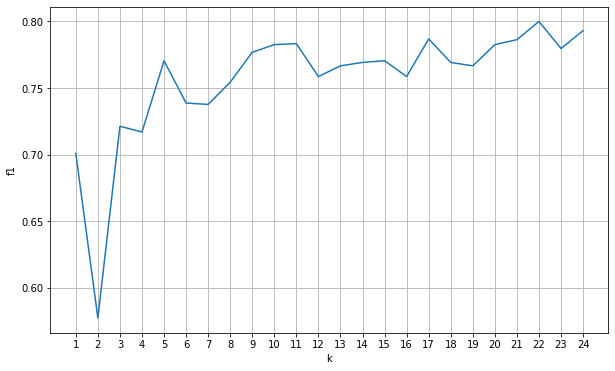

In [20]:
## optimal k ni topamiz
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import recall_score, precision_score, accuracy_score, f1_score
f1 = []
for i in range(1, 25):
    knn = KNeighborsClassifier(n_neighbors= i)
    knn.fit(X_train, y_train)
    y_predict = knn.predict(X_test)
    f1.append(f1_score(y_test, y_predict))
#grafik
plt.figure(figsize = (10,6))
plt.plot(range(1,25), f1)
plt.xticks(range(1,25))
plt.xlabel('k')
plt.ylabel('f1')
plt.grid()
plt.show()

In [21]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors':np.arange(1,25)}

knn_gscv  = GridSearchCV(knn, param_grid,cv=5)

knn_gscv.fit(X, y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=24),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])})

In [22]:
knn_gscv.cv_results_['rank_test_score']

array([21, 24, 22, 23, 19, 20, 11, 13, 12,  9,  7,  8,  3, 17,  2,  4,  1,
        4,  6, 16, 14, 10, 14, 18], dtype=int32)

In [23]:
knn_gscv.best_params_

{'n_neighbors': 17}

In [24]:
knn_gscv.best_score_

0.7574247144340602

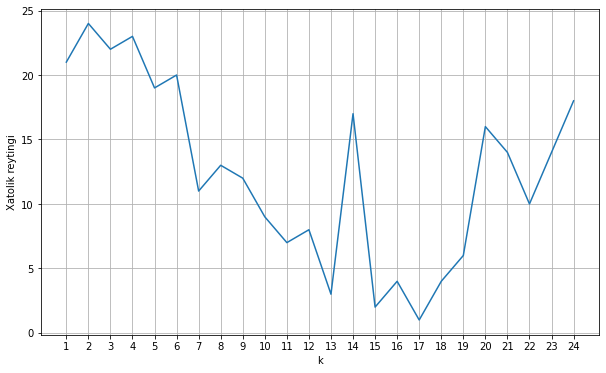

In [27]:
plt.figure(figsize=(10,6))
plt.plot(param_grid['n_neighbors'], knn_gscv.cv_results_['rank_test_score'])
plt.xticks(param_grid['n_neighbors'])
plt.xlabel("k")
plt.ylabel("Xatolik reytingi")
plt.grid()
plt.show()

### demak **k=22** ga teng bo`lganda f1_score ko'rstatgich yuqori ekan

In [28]:
## k-NN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=22)

# modelni o`qitish
knn.fit(X_train, y_train)

# bashorat
y_predict = knn.predict(X_test)

## Baholash

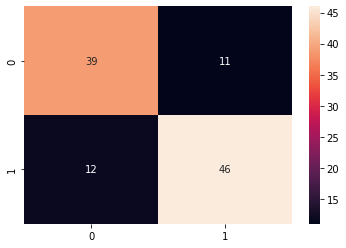

In [29]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(confusion_matrix(y_test, y_predict), annot=True)
plt.show()

In [32]:
from sklearn.metrics import jaccard_score, precision_score, recall_score, f1_score, accuracy_score

jaccard_score = jaccard_score(y_test, y_predict)
precision = precision_score(y_test, y_predict)
recall = recall_score(y_test, y_predict)
f1 = f1_score(y_test, y_predict)
accuracy = accuracy_score(y_test, y_predict)
print(f"jaccard_score= {jaccard_score}\nprecision = {precision}\nrecall = {recall}\nf1 = {f1}\naccuracy = {accuracy*100:.1f}%")

jaccard_score= 0.6666666666666666
precision = 0.8070175438596491
recall = 0.7931034482758621
f1 = 0.8
accuracy = 78.7%


## Cross validation

In [33]:
# Cross validation
from sklearn.model_selection import cross_val_predict
predict = cross_val_predict(estimator = knn, X = X, y = y, cv = 5)

# Modelni baholash
from sklearn.metrics import classification_report
print("Classification Report: \n",classification_report(y, predict))

Classification Report: 
               precision    recall  f1-score   support

           0       0.75      0.73      0.74       268
           1       0.74      0.75      0.75       268

    accuracy                           0.74       536
   macro avg       0.74      0.74      0.74       536
weighted avg       0.74      0.74      0.74       536



In [34]:
import joblib

filename = 'knn_model.jbl'

joblib.dump(knn, filename)

['knn_model.jbl']